
# Importing some necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Data Collection and Pre-Processing

In [2]:
#Loading the datasets
test_data = pd.read_csv('test_data.csv')
train_labels = pd.read_csv("training_data_targets.csv")
train_data= pd.read_csv('training_data.csv')

In [3]:
#Inspecting the first 5 rows of the dataframes
test_data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.4 kmpl,1997 CC,120 bhp,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.0 kmpl,1396 CC,69.01 bhp,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN


In [4]:
#Inspecting the first 5 rows of the dataframes
test_data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.4 kmpl,1997 CC,120 bhp,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.0 kmpl,1396 CC,69.01 bhp,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN


In [5]:
#Checking numberof rows and columns in the dataframes
test_data.shape

(602, 11)

In [6]:
train_data.shape

(5417, 11)

In [7]:
test_data.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [8]:
train_data.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

# Getting some information about the dataset

In [9]:
#getting some information about the dataset
test_data.describe()

,Year,Kilometers_Driven,Seats
count,602.000000,602.000000,598.000000
mean,2013.308970,57942.551495,5.264214
std,3.143948,43329.671873,0.785392
min,2003.000000,1000.000000,2.000000
25%,2011.000000,32391.500000,5.000000
50%,2014.000000,52308.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,720000.000000,10.000000


In [10]:
train_data.describe()

,Year,Kilometers_Driven,Seats
count,5417.000000,5.417000e+03,5379.000000
mean,2013.363670,5.882682e+04,5.280350
std,3.283659,9.511826e+04,0.811459
min,1998.000000,1.710000e+02,0.000000
25%,2011.000000,3.400000e+04,5.000000
50%,2014.000000,5.329300e+04,5.000000
75%,2016.000000,7.300000e+04,5.000000
max,2019.000000,6.500000e+06,10.000000


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              602 non-null    object 
 1   Location           602 non-null    object 
 2   Year               602 non-null    int64  
 3   Kilometers_Driven  602 non-null    int64  
 4   Fuel_Type          602 non-null    object 
 5   Transmission       602 non-null    object 
 6   Owner_Type         602 non-null    object 
 7   Mileage            601 non-null    object 
 8   Engine             600 non-null    object 
 9   Power              600 non-null    object 
 10  Seats              598 non-null    float64
dtypes: float64(1), int64(2), object(8)
memory usage: 51.9+ KB


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5417 entries, 0 to 5416
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5417 non-null   object 
 1   Location           5417 non-null   object 
 2   Year               5417 non-null   int64  
 3   Kilometers_Driven  5417 non-null   int64  
 4   Fuel_Type          5417 non-null   object 
 5   Transmission       5417 non-null   object 
 6   Owner_Type         5417 non-null   object 
 7   Mileage            5416 non-null   object 
 8   Engine             5383 non-null   object 
 9   Power              5383 non-null   object 
 10  Seats              5379 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 465.7+ KB


# Checking the missing values

In [13]:
train_data.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                38
dtype: int64

In [14]:
test_data.isnull().sum()

Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              1
Engine               2
Power                2
Seats                4
dtype: int64

# Imputing the missing values

In [15]:
# Impute missing values with the mean
median_seats = train_data['Seats'].median()
train_data['Seats'].fillna(median_seats, inplace=True)

In [16]:
# Assuming 'Mileage' is the column with missing values and it's given in kmpl
mean_mileage = train_data['Mileage'].str.extract('(\d+\.\d+)').astype(float).mean()

# Impute missing values with the mean
train_data['Mileage'].fillna(f'{mean_mileage} kmpl', inplace=True)

In [17]:
# Assuming 'Engine' is the column with missing values and it's given in CC
mean_engine = train_data['Engine'].str.extract('(\d+\.\d+)').astype(float).mean()

# Impute missing values with the mean
train_data['Engine'].fillna(f'{mean_engine} cc', inplace=True)

In [18]:
# Assuming 'Power' is the column with missing values and it's given in bhp
mean_power = train_data['Mileage'].str.extract('(\d+\.\d+)').astype(float).mean()

# Impute missing values with the mean
train_data['Power'].fillna(f'{mean_power} bhp', inplace=True)

In [19]:
train_data.isnull().sum()

Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [20]:
#Imputing the missing values with the median
median_seats = test_data['Seats'].median()
test_data['Seats'].fillna(median_seats, inplace=True)

In [21]:
# Assuming 'Mileage' is the column with missing values and it's given in kmpl
mean_mileage = test_data['Mileage'].str.extract('(\d+\.\d+)').astype(float).mean()

# Impute missing values with the mean
test_data['Mileage'].fillna(f'{mean_mileage} kmpl', inplace=True)

In [22]:
# Assuming 'Engine' is the column with missing values and it's given in CC
mean_engine = test_data['Engine'].str.extract('(\d+\.\d+)').astype(float).mean()
# Impute missing values with the mean
test_data['Engine'].fillna(f'{mean_engine} cc', inplace=True)

In [23]:
# Assuming 'Power' is the column with missing values and it's given in bhp
mean_power = test_data['Power'].str.extract('(\d+\.\d+)').astype(float).mean()

# Impute missing values with the mean
test_data['Power'].fillna(f'{mean_power} bhp', inplace=True)

In [24]:
test_data.isnull().sum()

Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

# Checking the categorical data

In [25]:
print(train_data.Location.value_counts())
print(train_data.Fuel_Type.value_counts())
print(train_data.Transmission.value_counts())
print(train_data.Owner_Type.value_counts())

Mumbai        706
Hyderabad     668
Coimbatore    579
Kochi         575
Pune          564
Delhi         512
Kolkata       475
Chennai       439
Jaipur        368
Bangalore     333
Ahmedabad     198
Name: Location, dtype: int64
Diesel      2876
Petrol      2482
CNG           49
LPG            9
Electric       1
Name: Fuel_Type, dtype: int64
Manual       3890
Automatic    1527
Name: Transmission, dtype: int64
First             4431
Second             875
Third              103
Fourth & Above       8
Name: Owner_Type, dtype: int64


In [26]:
print(test_data.Location.value_counts())
print(test_data.Fuel_Type.value_counts())
print(test_data.Transmission.value_counts())
print(test_data.Owner_Type.value_counts())

Mumbai        84
Kochi         76
Hyderabad     74
Kolkata       60
Pune          58
Coimbatore    57
Chennai       55
Jaipur        45
Delhi         42
Ahmedabad     26
Bangalore     25
Name: Location, dtype: int64
Diesel      329
Petrol      264
CNG           7
LPG           1
Electric      1
Name: Fuel_Type, dtype: int64
Manual       409
Automatic    193
Name: Transmission, dtype: int64
First             498
Second             93
Third              10
Fourth & Above      1
Name: Owner_Type, dtype: int64


In [27]:
#Label Encoding "FUEL_TYPE" Column
#train_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace= True)

#Label Encoding "TRANSMISSION" Column
#train_data.replace({'Transmission':{'Manual':0,'Automatic':1,}}, inplace= True)

#Label Encoding "OWNER_TYPE" Column
#train_data.replace({'Owner_Type':{'First':0,'Second':1,'Third':2,'Fourth & Above':3}}, inplace= True)

#Label Encoding "LOCATION" Column
#train_data.replace({'Location':{'Mumbai':0,'Hyderabad':1,'Coimbatore':2,'Kochi':3,'Pune':4,'Delhi':5,'Kolkata':6,'Chennai':7,'Jaipur':8,'Bangalore':9,'Ahmedabad':10}}, inplace= True)

In [28]:
train_data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0


In [29]:
#Label Encoding "FUEL_TYPE" Column
#test_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace= True)

#Label Encoding "TRANSMISSION" Column
#test_data.replace({'Transmission':{'Manual':0,'Automatic':1,}}, inplace= True)

#Label Encoding "OWNER_TYPE" Column
#test_data.replace({'Owner_Type':{'First':0,'Second':1,'Third':2,'Fourth & Above':3}}, inplace= True)

#Label Encoding "LOCATION" Column
#test_data.replace({'Location':{'Mumbai':0,'Hyderabad':1,'Coimbatore':2,'Kochi':3,'Pune':4,'Delhi':5,'Kolkata':6,'Chennai':7,'Jaipur':8,'Bangalore':9,'Ahmedabad':10}}, inplace= True)

In [30]:
test_data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.4 kmpl,1997 CC,120 bhp,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.0 kmpl,1396 CC,69.01 bhp,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0 kmpl,0 NaN\ndtype: float64 cc,0 108.355665\ndtype: float64 bhp,5.0


# Encoding of the dataset

In [31]:
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()

# Fit and transform 'Brand' column to numerical labels for "Testing dataset"
#test_data['Brand_Label'] = label_encoder.fit_transform(test_data['Brand'])

#print(test_data)

In [32]:
# Fit and transform 'Brand' column to numerical labels for "Training Dataset"
#train_data['Brand_Label'] = label_encoder.fit_transform(train_data['Brand'])

#print(train_data)

# One Hot Encoding

In [33]:
# One-hot encoding for "Fuel_Type" Column
test_data = pd.get_dummies(test_data, columns=['Fuel_Type'], prefix='Fuel_Type')

# One-hot encoding for "Transmission" Column
test_data = pd.get_dummies(test_data, columns=['Transmission'], prefix='Transmission')

# One-hot encoding for "Owner_Type" Column
test_data = pd.get_dummies(test_data, columns=['Owner_Type'], prefix='Owner_Type')

# One-hot encoding for "Fuel_Type" Column
train_data = pd.get_dummies(train_data, columns=['Fuel_Type'], prefix='Fuel_Type')

# One-hot encoding for "Transmission" Column
train_data = pd.get_dummies(train_data, columns=['Transmission'], prefix='Transmission')

# One-hot encoding for "Owner_Type" Column
train_data = pd.get_dummies(train_data, columns=['Owner_Type'], prefix='Owner_Type')

# Drop columns 'Brand','Location',Year 
columns_to_drop = ['Brand', 'Location', 'Year']
train_data = train_data.drop(columns=columns_to_drop)

columns_to_drop = ['Brand', 'Location', 'Year']
test_data = test_data.drop(columns=columns_to_drop)

In [34]:
# Extracting the numerical columns and converting them to the appropriate types
train_data['Mileage'] = train_data['Mileage'].str.extract('(\d+\.\d+)').astype(float)
train_data['Engine'] = train_data['Engine'].str.extract('(\d+)').astype(float)
train_data['Power'] = train_data['Power'].str.extract('(\d+\.\d+)').astype(float)
test_data['Mileage'] = test_data['Mileage'].str.extract('(\d+\.\d+)').astype(float)
test_data['Engine'] = test_data['Engine'].str.extract('(\d+)').astype(float)
test_data['Power'] = test_data['Power'].str.extract('(\d+\.\d+)').astype(float)

In [35]:
test_data

,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,69000,23.40,1248.0,NaN,5.0,0,1,0,0,0,0,1,1,0,0,0
1,26741,15.40,1997.0,NaN,7.0,0,1,0,0,0,0,1,1,0,0,0
2,86000,15.10,2179.0,NaN,7.0,0,1,0,0,0,0,1,1,0,0,0
3,52000,25.00,1396.0,69.010000,5.0,0,1,0,0,0,0,1,0,0,1,0
4,100000,0.00,0.0,108.355665,5.0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,78000,14.53,1794.0,138.100000,5.0,0,0,0,0,1,1,0,0,0,1,0
598,55231,20.36,1197.0,78.900000,5.0,0,0,0,0,1,0,1,0,0,1,0
599,130000,19.30,1248.0,73.900000,5.0,0,1,0,0,0,0,1,0,0,1,0
600,39500,15.00,2143.0,NaN,5.0,0,1,0,0,0,1,0,1,0,0,0


In [36]:
train_data

,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,35214,23.10,998.0,67.04,5.0,0,0,0,0,1,1,0,0,0,1,0
1,71000,14.16,1968.0,174.30,5.0,0,1,0,0,0,1,0,1,0,0,0
2,111000,23.59,1364.0,67.10,5.0,0,1,0,0,0,0,1,1,0,0,0
3,90400,26.20,998.0,58.20,5.0,1,0,0,0,0,0,1,1,0,0,0
4,68630,20.51,998.0,NaN,5.0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,27000,17.97,1498.0,99.60,5.0,0,0,0,0,1,1,0,1,0,0,0
5413,9000,12.62,2198.0,NaN,7.0,0,1,0,0,0,1,0,1,0,0,0
5414,140000,15.10,2179.0,NaN,7.0,0,1,0,0,0,0,1,0,0,1,0
5415,76414,25.80,1498.0,98.60,5.0,0,1,0,0,0,0,1,1,0,0,0


# Correlation Matrix 

<Axes: >

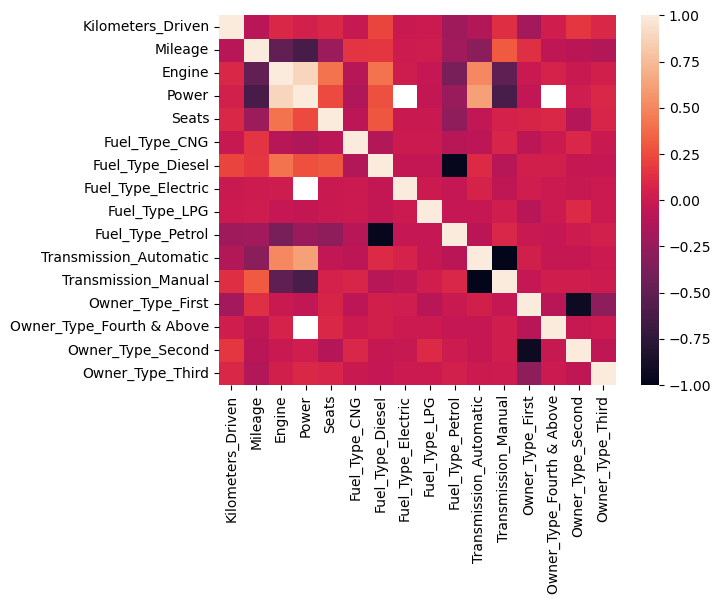

In [37]:
#Finding the correlation matrix for test dataset:
correlation = test_data.corr()
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns)

<Axes: >

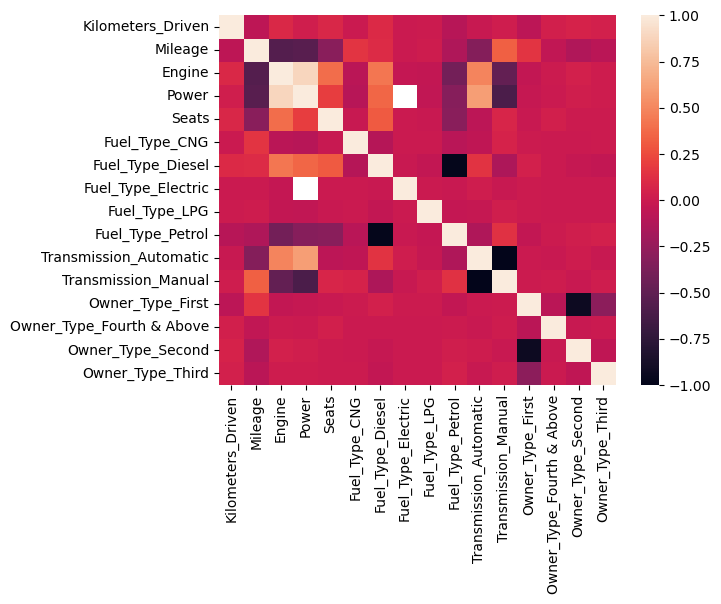

In [38]:
#Finding the correlation matrix for train dataset:
correlation = train_data.corr()
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns)

Scatter Plots:-

C:\Users\gargi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


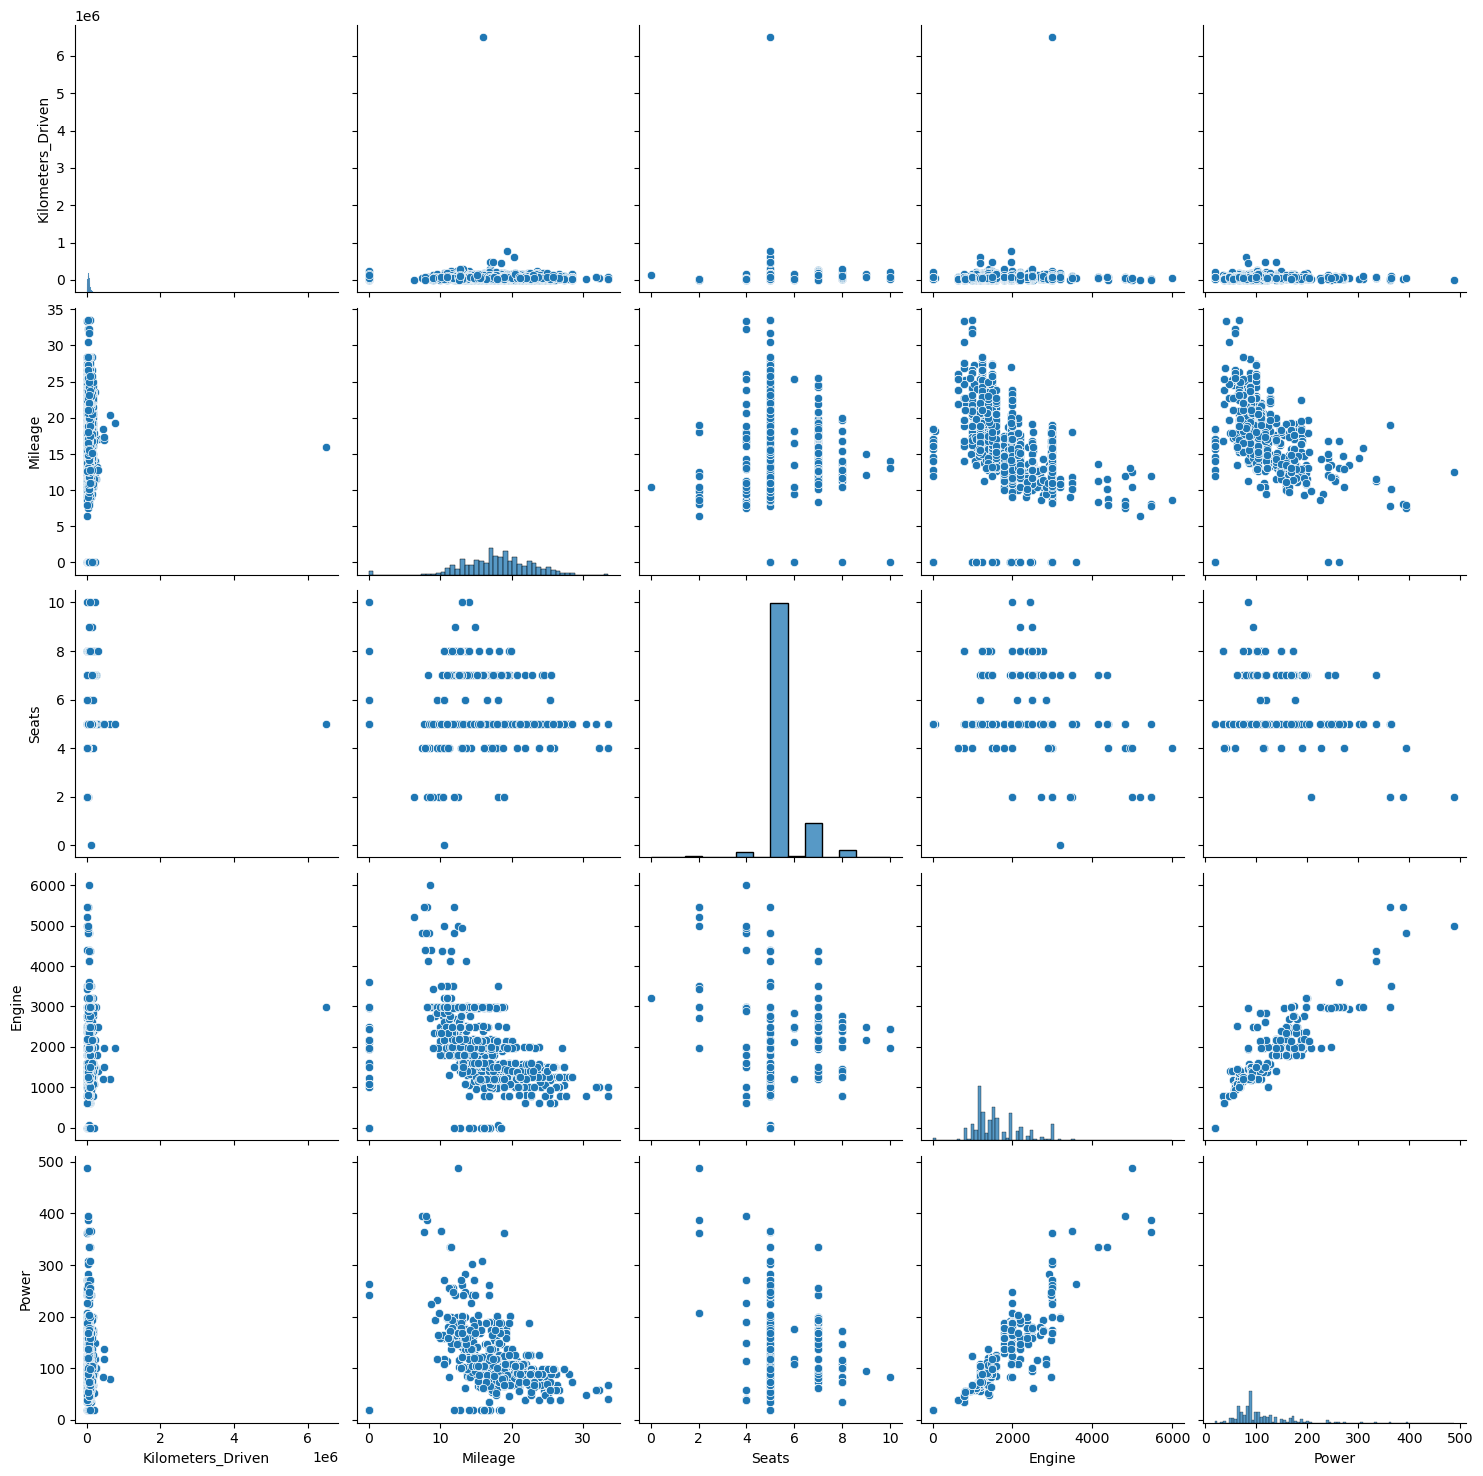

In [39]:
#scatter plot for numerical features
num_features = ["Kilometers_Driven","Mileage","Seats","Engine","Power"]
sns.pairplot(train_data[num_features],size = 3.0)
plt.show();

C:\Users\gargi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


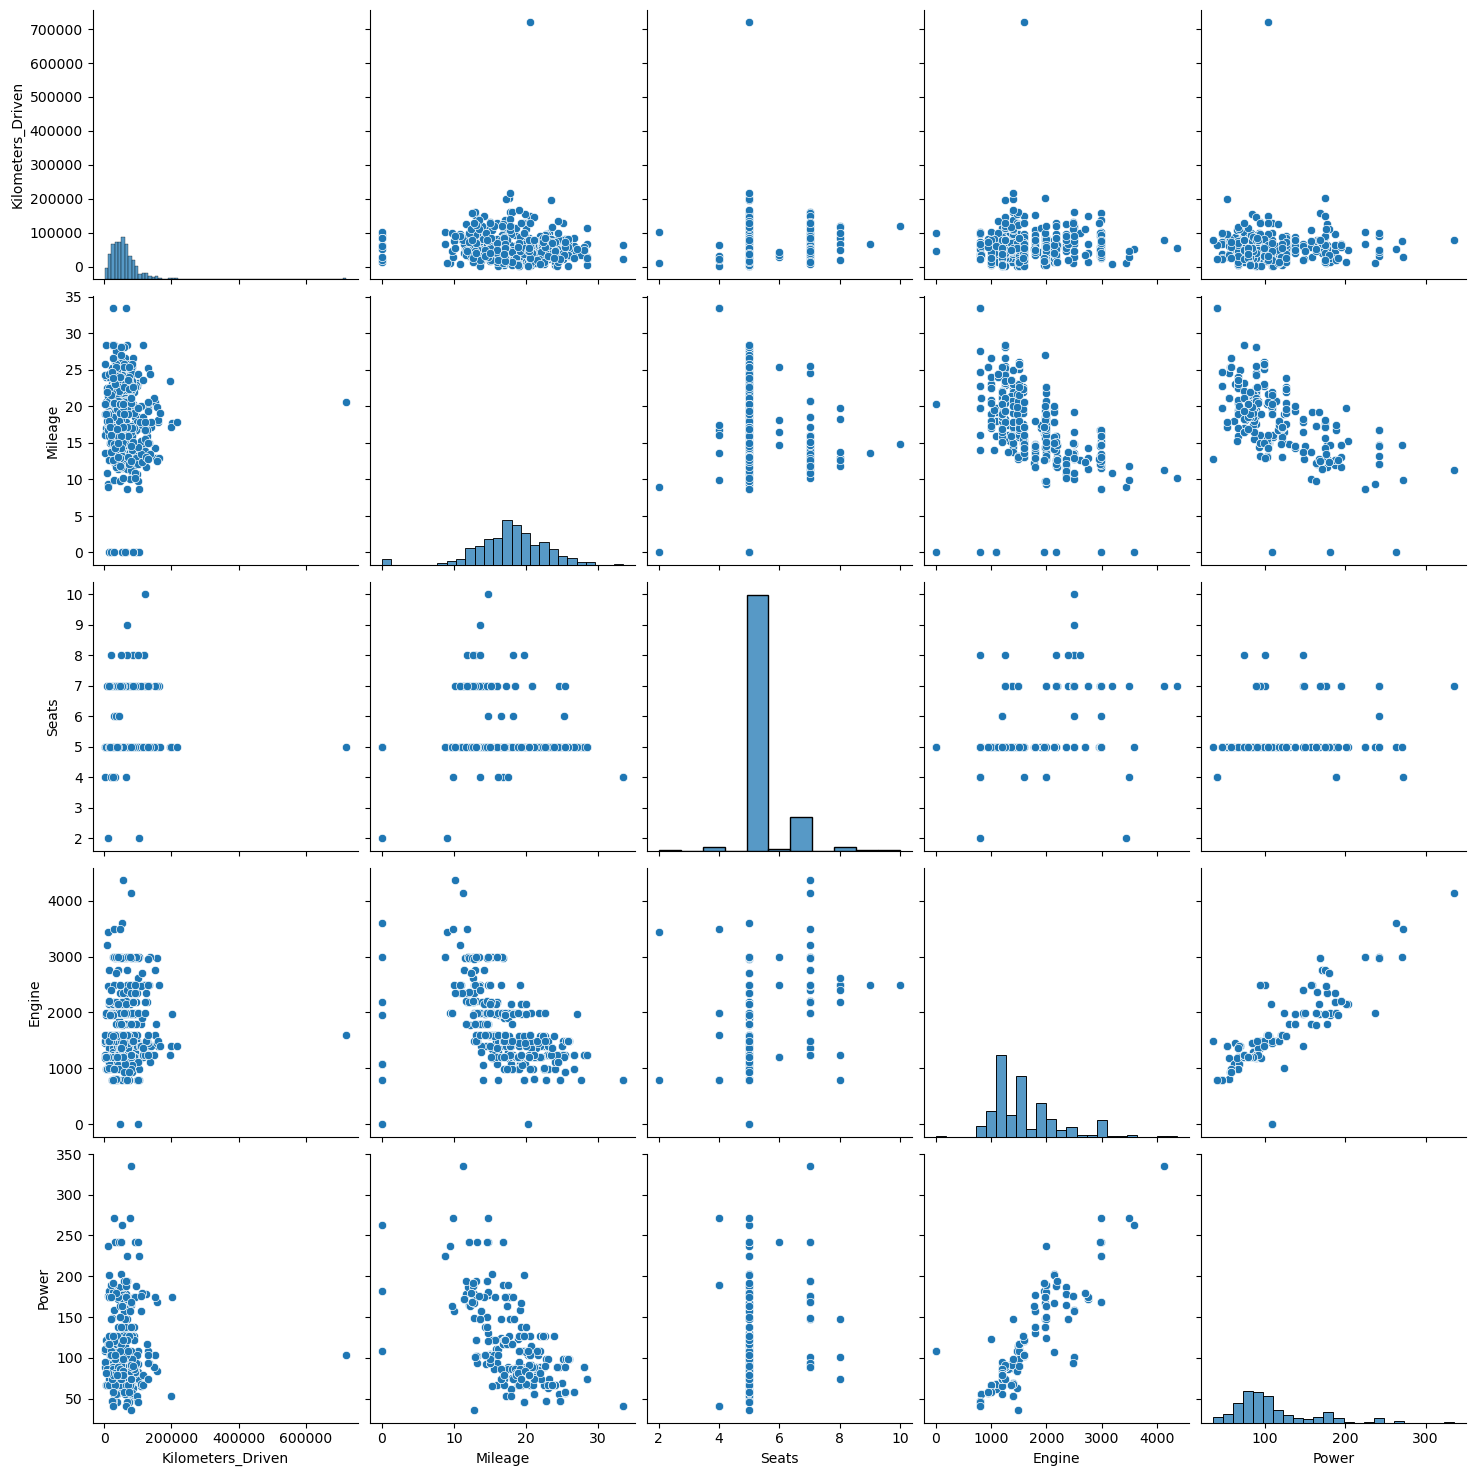

In [40]:
#scatter plot for numerical features
num_features = ["Kilometers_Driven","Mileage","Seats","Engine","Power"]
sns.pairplot(test_data[num_features],size = 3.0)
plt.show();

C:\Users\gargi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


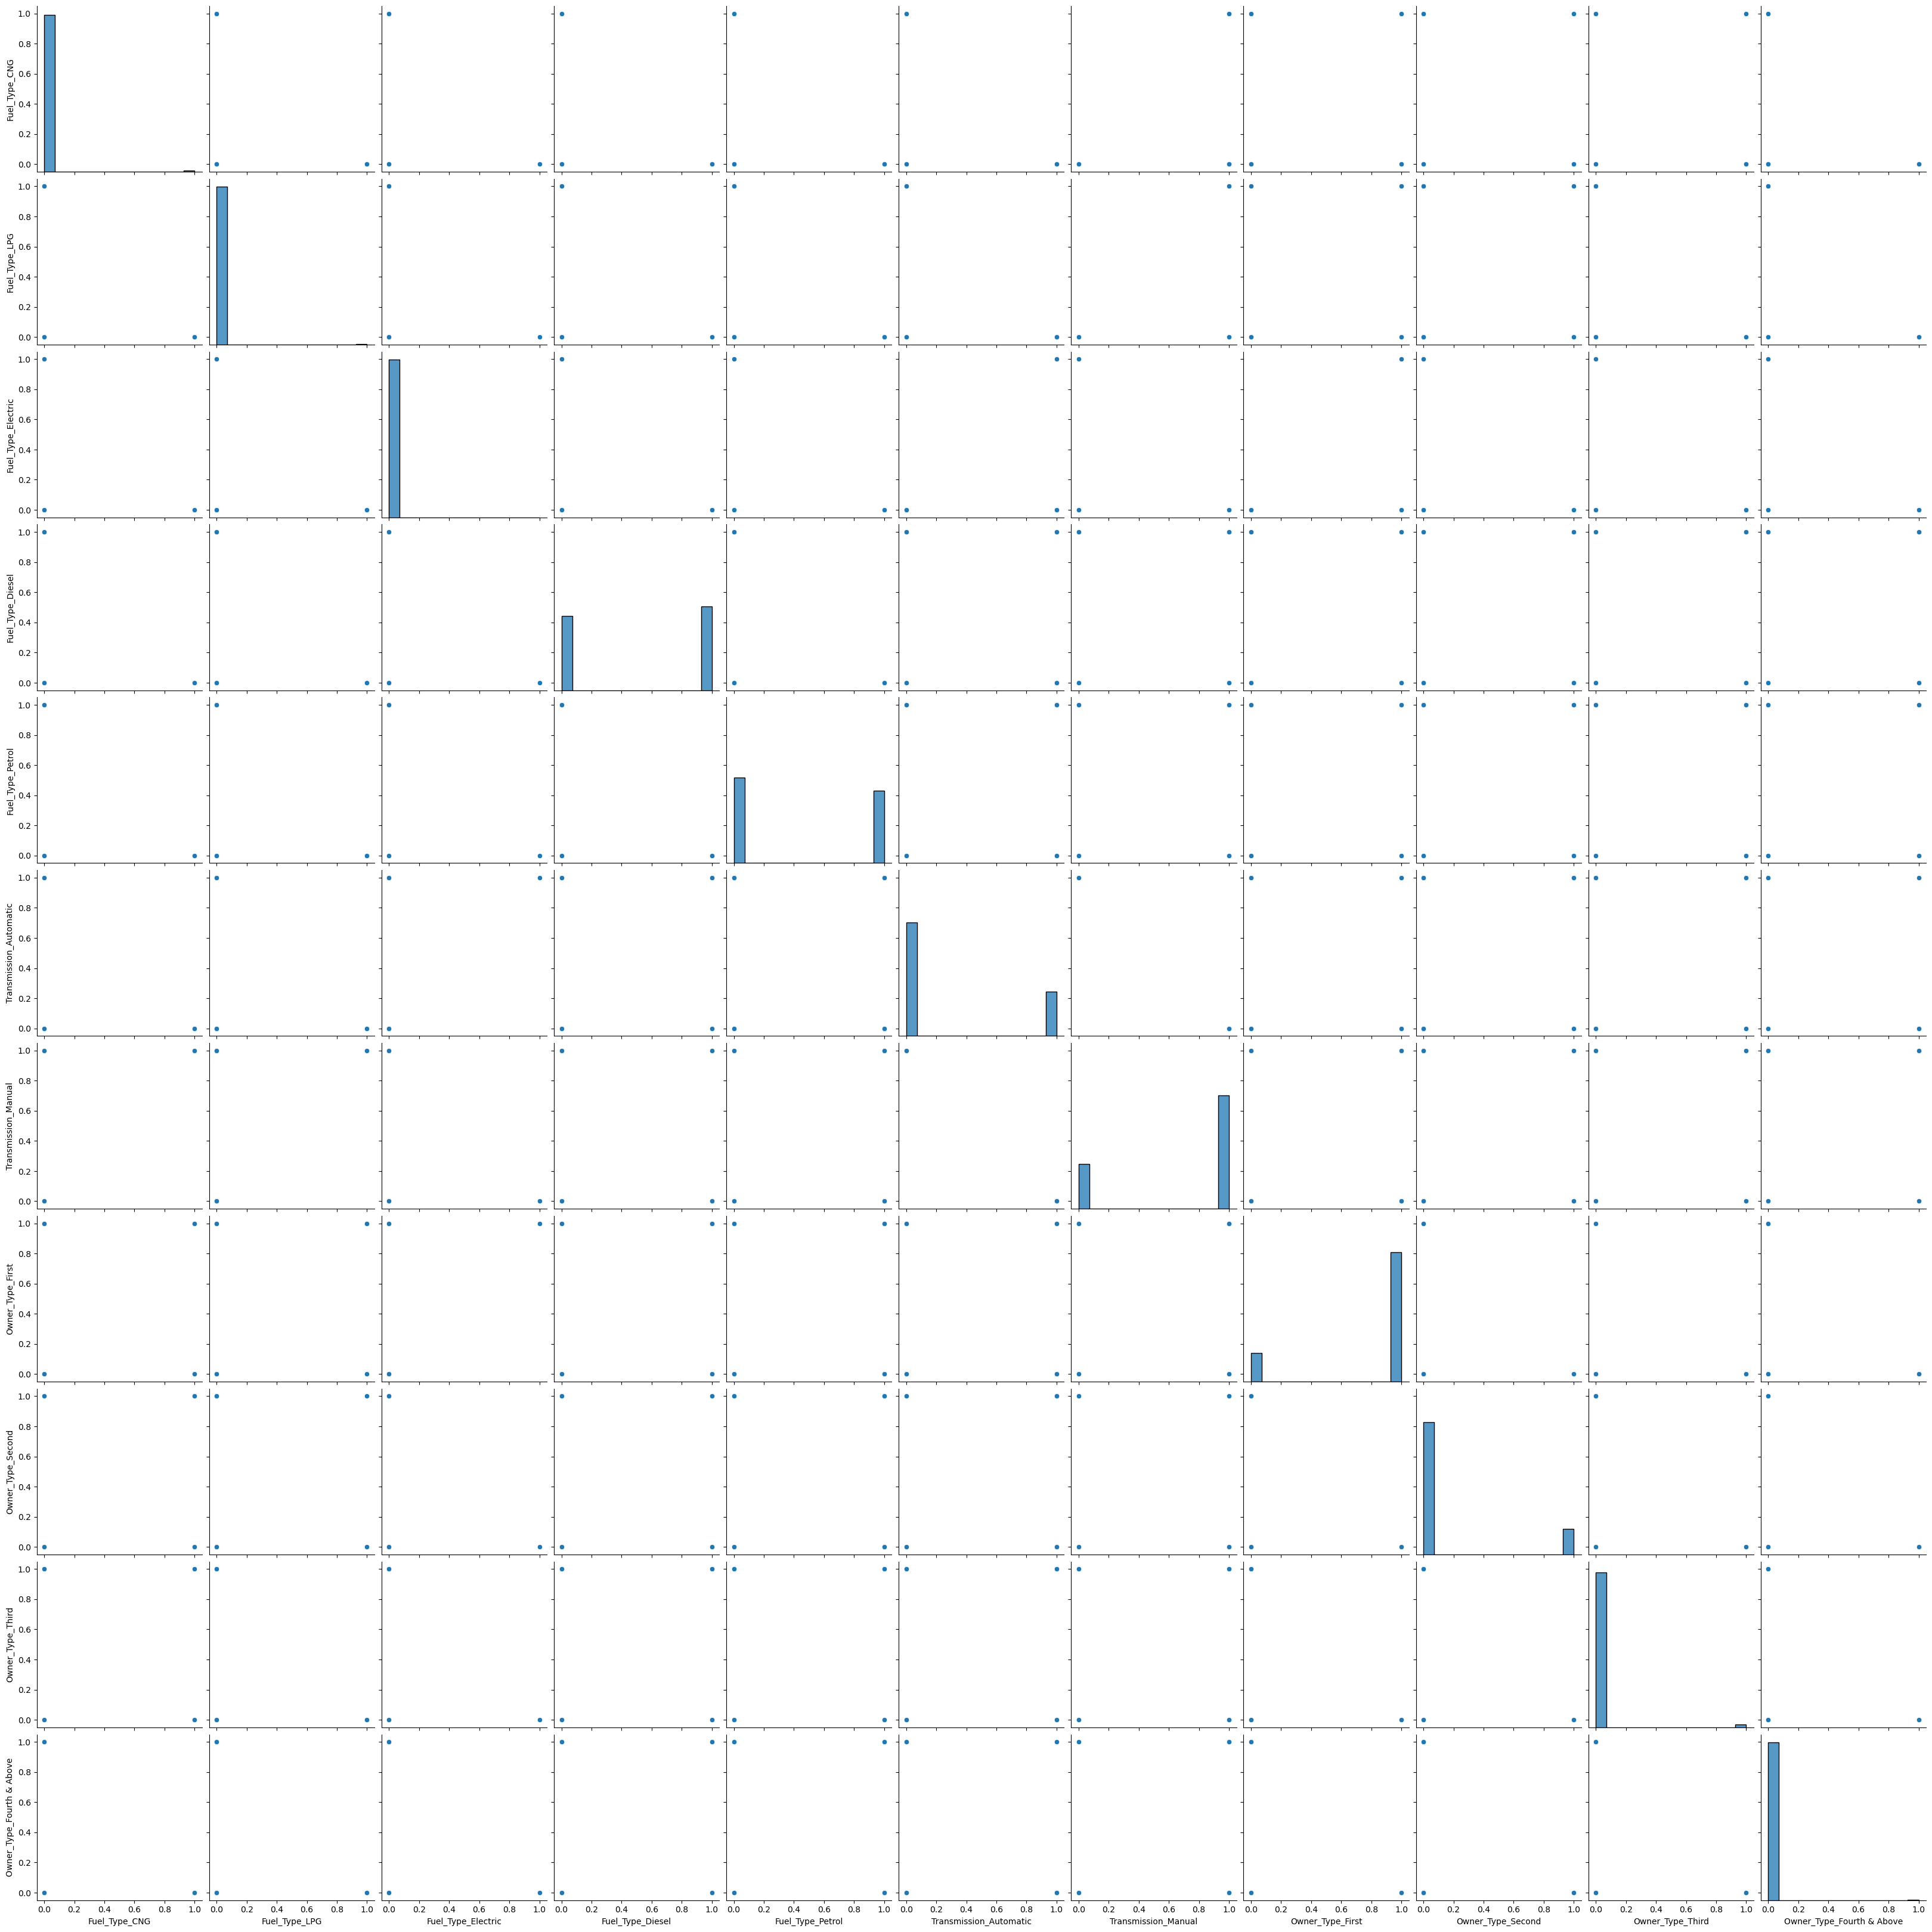

In [41]:
#scatter plot for categorical features:
num_features = ['Fuel_Type_CNG','Fuel_Type_LPG','Fuel_Type_Electric','Fuel_Type_Diesel','Fuel_Type_Petrol',
       'Transmission_Automatic','Transmission_Manual', 'Owner_Type_First','Owner_Type_Second','Owner_Type_Third','Owner_Type_Fourth & Above']
sns.pairplot(train_data[num_features],size = 3.0)
plt.show();

C:\Users\gargi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


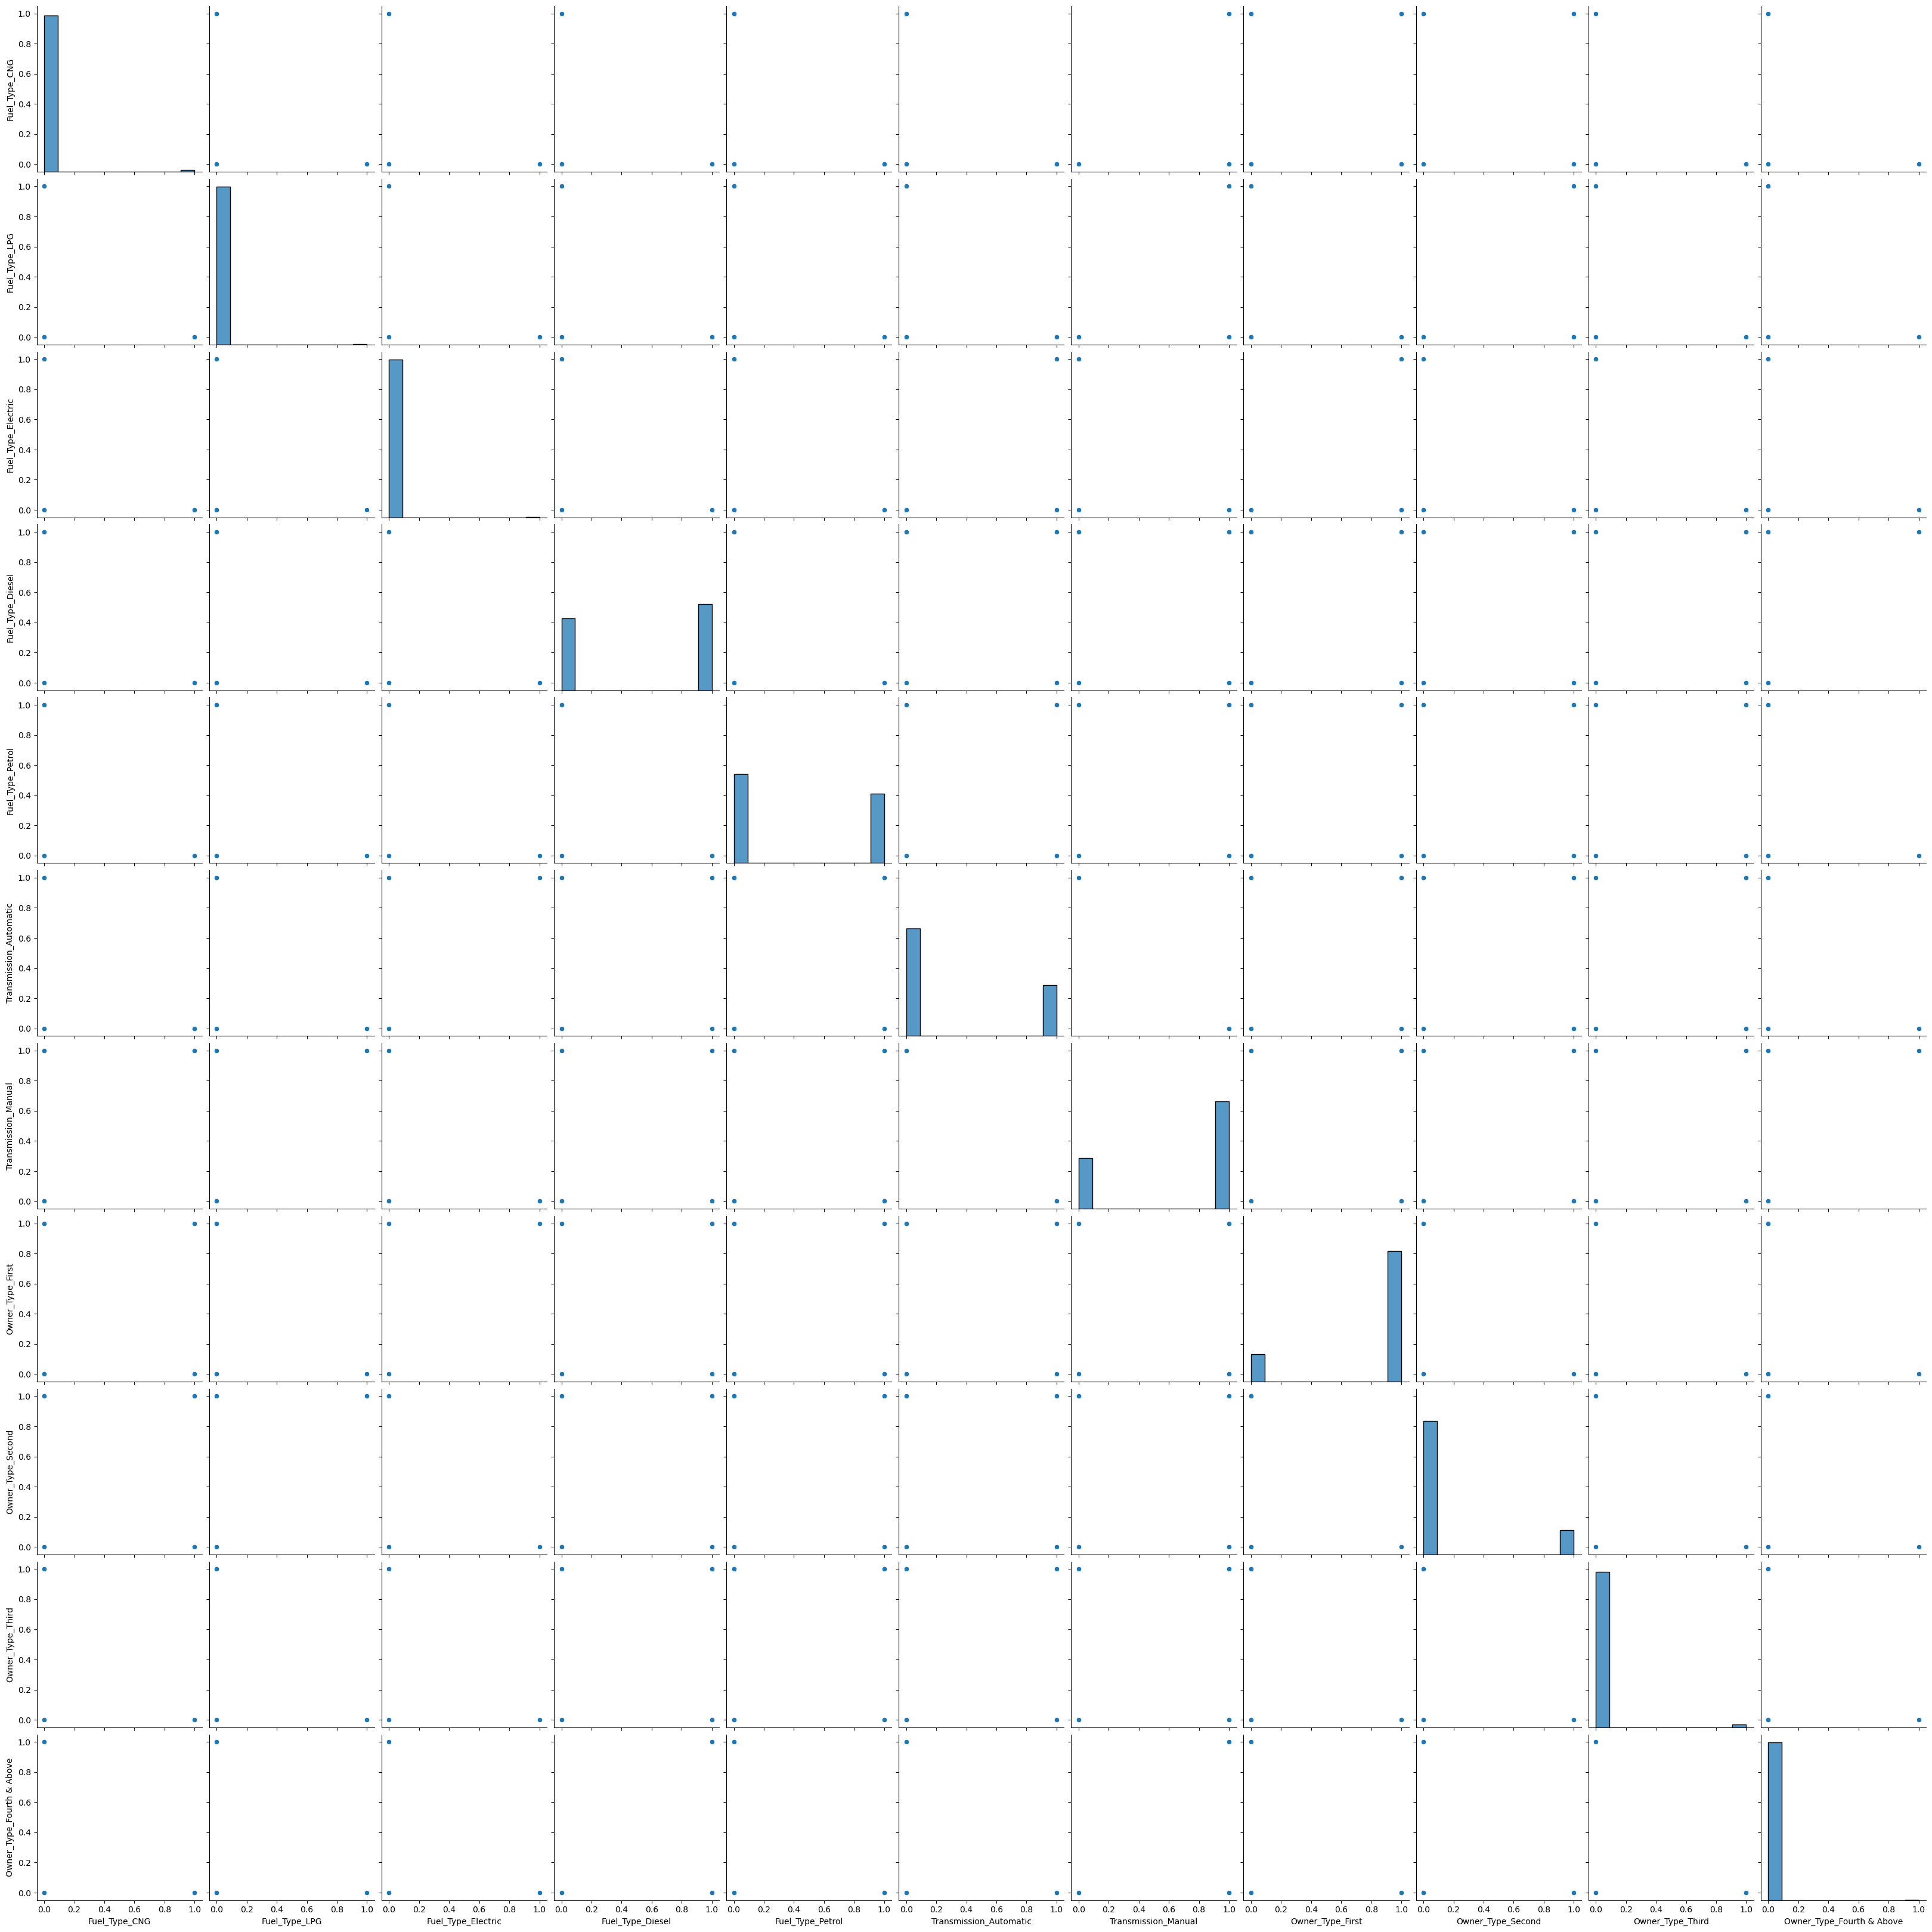

In [42]:
#scatter plot for categorical features:
num_features = ['Fuel_Type_CNG','Fuel_Type_LPG','Fuel_Type_Electric','Fuel_Type_Diesel','Fuel_Type_Petrol',
       'Transmission_Automatic','Transmission_Manual', 'Owner_Type_First','Owner_Type_Second','Owner_Type_Third','Owner_Type_Fourth & Above']
sns.pairplot(test_data[num_features],size = 3.0)
plt.show();

# Linear Regression

In [43]:
test_data2 = test_data[['Kilometers_Driven', 'Fuel_Type_CNG','Fuel_Type_LPG','Fuel_Type_Electric','Fuel_Type_Diesel','Fuel_Type_Petrol',
       'Transmission_Automatic','Transmission_Manual', 'Owner_Type_First','Owner_Type_Second','Owner_Type_Third','Owner_Type_Fourth & Above', 'Mileage', 'Engine', 'Seats']]

In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


#X =  train_data[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Seats', 'Brand_Label']]
X = train_data[['Kilometers_Driven', 'Fuel_Type_CNG','Fuel_Type_LPG','Fuel_Type_Electric','Fuel_Type_Diesel','Fuel_Type_Petrol',
       'Transmission_Automatic','Transmission_Manual', 'Owner_Type_First','Owner_Type_Second','Owner_Type_Third','Owner_Type_Fourth & Above', 'Mileage', 'Engine', 'Seats']]
y =  pd.read_csv("training_data_targets.csv",header=None, names= ["price"])

model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

train_predictions = best_model.predict(X)

# Calculate Mean Squared Error (MSE) using the best model
mse = mean_squared_error(y, train_predictions)
print("Mean Squared Error (MSE) with Best Model:", mse)

rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y, train_predictions)
print(f"R-squared (R2) score on the test set: {r2:.4f}")

mae = mean_absolute_error(y, train_predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Best Parameters: {'fit_intercept': True}
Mean Squared Error (MSE) with Best Model: 55.48304903608778
Root Mean Squared Error (RMSE): 7.448694451787358
R-squared (R2) score on the test set: 0.5550
Mean Absolute Error (MAE): 4.5323


# Random Forest Regressor

In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


model = RandomForestRegressor(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20],
    'max_features':['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X)

# Calculate evaluation metrics using the best model
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE) with Best Model:", mse)

rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y, y_pred)
print(f"R-squared (R2) score on the test set: {r2:.4f}")

mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}
Mean Squared Error (MSE) with Best Model: 3.4013190167985745
Root Mean Squared Error (RMSE): 1.8442665254237454
R-squared (R2) score on the test set: 0.9727
Mean Absolute Error (MAE): 0.9100


# Decision Tree Regressor

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  

param_grid = {
    'max_depth': [2, 8, 9],  
    'min_samples_split': [5, 10, 15]  
    
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

y_pred_dt = best_model.predict(X)

# Calculate evaluation metrics using the best model
mse = mean_squared_error(y, y_pred_dt)
print("Mean Squared Error (MSE) with Best Model:", mse)

rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y, y_pred_dt)
print(f"R-squared (R2) score on the test set: {r2:.4f}")

mae = mean_absolute_error(y, y_pred_dt)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Best Parameters: {'max_depth': 8, 'min_samples_split': 10}
Mean Squared Error (MSE) with Best Model: 21.855212798144315
Root Mean Squared Error (RMSE): 4.674955914032165
R-squared (R2) score on the test set: 0.8247
Mean Absolute Error (MAE): 2.4784


# K Nearest Neighbor

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


knn_model = KNeighborsRegressor(n_neighbors=5)  

param_grid = {
    'n_neighbors': [7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

y_pred_km = best_model.predict(X)

# Calculate evaluation metrics using the best model
mse = mean_squared_error(y, y_pred_km)
print("Mean Squared Error (MSE) with Best Model:", mse)

rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y, y_pred_km)
print(f"R-squared (R2) score on the test set: {r2:.4f}")

mae = mean_absolute_error(y, y_pred_km)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Mean Squared Error (MSE) with Best Model: 0.15504385576272228
Root Mean Squared Error (RMSE): 0.393756086635778
R-squared (R2) score on the test set: 0.9988
Mean Absolute Error (MAE): 0.0409


# Support Vector Regressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


svr_model = SVR()  

param_grid = {
    'C': [1, 10, 100],  
    'gamma': ['scale', 'auto'], 
    'kernel':['rbf','linear', 'poly']
}

grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

y_pred_svr = best_model.predict(X)

# Calculate evaluation metrics using the best model
mse = mean_squared_error(y, y_pred_svr)
print("Mean Squared Error (MSE) with Best Model:", mse)

rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y, y_pred_svr)
print(f"R-squared (R2) score on the test set: {r2:.4f}")

mae = mean_absolute_error(y, y_pred_svr)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gargi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

# RESULTS

On comparing the Root Mean Square Error, Mean Absolute Error, Mean Square Error and R2 of all the above models we got the K-Nearest Neighbor model as a best model.

In [ ]:
y_pred_km_test = best_model.predict(test_data2)

In [ ]:
# Print the DataFrame line by line
for price in y_pred_km_test:
    print(price)

In [ ]:
#Printing the predicted labels of the best model(Random Forest Regressor):-
np.savetxt("PredictedLabels.txt", y_pred_km_test, delimiter="\n", fmt="%.4f")